In [1]:
#Import libraries for visualisation
import numpy as np
import pandas as pd

In [2]:
#import dataset
test_df = pd.read_csv('test.csv')
train_df = pd.read_csv('train.csv')

In [3]:
#Check the shape of the dataset
print ("Test dataset shape:", test_df.shape)
print ("Train dataset shape:", train_df.shape)

Test dataset shape: (1459, 80)
Train dataset shape: (1460, 81)


In [4]:
#look at a few rows of the training dataset
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
#might as well look at the test dataset just to see the difference in the 2 datasets
test_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [6]:
#load popular visalisation library
import matplotlib.pyplot as plt
plt.style.use(style='ggplot')
plt.rcParams['figure.figsize'] = (10, 6)

In [7]:
#retrieve more information about the target variable(Sale Price of each home)
train_df.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

The distribution skew is: 1.8828757597682129


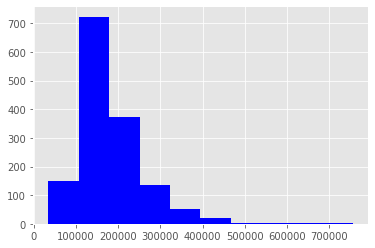

In [8]:
#print the distribution's skewness
print ("The distribution skew is:", train_df.SalePrice.skew())
plt.hist(train_df.SalePrice, color='blue')
plt.show()

The distribution skew is: 0.12133506220520406


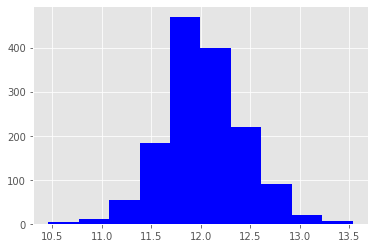

In [9]:
#Improve the skewness by taking a log function of the target = np.log(train_df.SalePrice)
target = np.log(train_df.SalePrice)
print ("The distribution skew is:", target.skew())
plt.hist(target, color='blue')
plt.show()

In [10]:
#we now check for numeric features and visualise
numeric_features = train_df.select_dtypes(include=[np.number])
numeric_features.dtypes

Id                 int64
MSSubClass         int64
LotFrontage      float64
LotArea            int64
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
MasVnrArea       float64
BsmtFinSF1         int64
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
1stFlrSF           int64
2ndFlrSF           int64
LowQualFinSF       int64
GrLivArea          int64
BsmtFullBath       int64
BsmtHalfBath       int64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
TotRmsAbvGrd       int64
Fireplaces         int64
GarageYrBlt      float64
GarageCars         int64
GarageArea         int64
WoodDeckSF         int64
OpenPorchSF        int64
EnclosedPorch      int64
3SsnPorch          int64
ScreenPorch        int64
PoolArea           int64
MiscVal            int64
MoSold             int64
YrSold             int64
SalePrice          int64
dtype: object

In [11]:
#Now let's find out if there is any correlation between the numeric features and the target
corr = numeric_features.corr()
#the line below prints out the most positively correlated
print (corr['SalePrice'].sort_values(ascending=False)[:5], '\n')
#the line below prints out the most negatively correlated
print (corr['SalePrice'].sort_values(ascending=False)[-5:])

SalePrice      1.000000
OverallQual    0.790982
GrLivArea      0.708624
GarageCars     0.640409
GarageArea     0.623431
Name: SalePrice, dtype: float64 

YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64


In [12]:
#Lets check the unique rating values for the overall material and finish of the house
train_df.OverallQual.unique()

array([ 7,  6,  8,  5,  9,  4, 10,  3,  1,  2], dtype=int64)

In [13]:
#lets create a pivot table to further check the relationship between Saleprice and OverallQual
quality_pivot = train_df.pivot_table(index='OverallQual',
                  values='SalePrice', aggfunc=np.median)

In [14]:
quality_pivot

,SalePrice
OverallQual,
1,50150
2,60000
3,86250
4,108000
5,133000
6,160000
7,200141
8,269750
9,345000


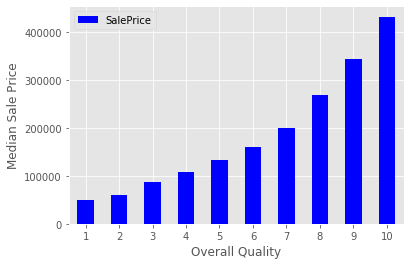

In [15]:
#lets use a barplot to visualise
quality_pivot.plot(kind='bar', color='blue')
plt.xlabel('Overall Quality')
plt.ylabel('Median Sale Price')
plt.xticks(rotation=0)
plt.show()

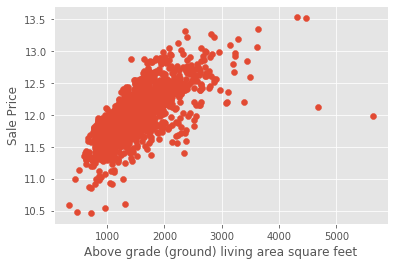

In [16]:
#let's visualise ground living area using scatter plots this time
#The plot is consistent with the correlation results
plt.scatter(x=train_df['GrLivArea'], y=target)
plt.ylabel('Sale Price')
plt.xlabel('Above grade (ground) living area square feet')
plt.show()

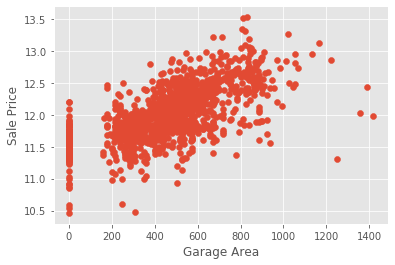

In [17]:
#let's further visualise Garage area using scatter plots this time
#The plot is consistent with the correlation results
plt.scatter(x=train_df['GarageArea'], y=target)
plt.ylabel('Sale Price')
plt.xlabel('Garage Area')
plt.show()

In [18]:
#Now looking at the above scatter, we can tell that there are outliers for garage area of more than 1200
#for our model, we will remove these.
train = train_df[train_df['GarageArea'] < 1200]

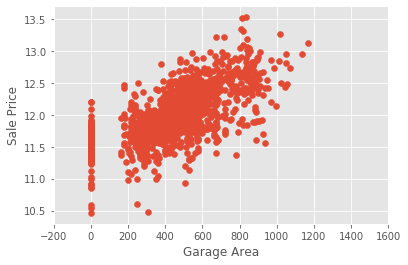

In [19]:
#So we visualise again with a log function of the target values
plt.scatter(x=train['GarageArea'], y=np.log(train.SalePrice))
plt.xlim(-200,1600) #To avoid scale errors, include this line
plt.ylabel('Sale Price')
plt.xlabel('Garage Area')
plt.show()

In [20]:
#Null values can sometimes cause skewness in distributions
#Before we continue with categorical variables, lets treat Null variables
nulls = pd.DataFrame(train.isnull().sum().sort_values(ascending=False)[:25])
nulls.columns = ['Null Count']
nulls.index.name = 'Feature'
nulls

,Null Count
Feature,
PoolQC,1449
MiscFeature,1402
Alley,1364
Fence,1174
FireplaceQu,689
LotFrontage,258
GarageCond,81
GarageType,81
GarageYrBlt,81


In [21]:
#Explore unique values in miscellaneous features and Pool QC
print ("Unique Misc values are:", train.MiscFeature.unique())
print("Unique PoolQC values are:", train.PoolQC.unique())

Unique Misc values are: [nan 'Shed' 'Gar2' 'Othr' 'TenC']
Unique PoolQC values are: [nan 'Ex' 'Fa' 'Gd']


In [22]:
#we will keep all these features for later use
#lets now look at the categorical features

In [23]:
#we will now explude numbers or numerical values stats
#For most features, we might use OHE for modeling
categoricals = train.select_dtypes(exclude=[np.number])
categoricals.describe()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1455,1455,91,1455,1455,1455,1455,1455,1455,1455,...,1374,1374,1374,1374,1455,6,281,53,1455,1455
unique,5,2,2,4,4,2,5,3,25,9,...,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Ex,MnPrv,Shed,WD,Normal
freq,1147,1450,50,921,1309,1454,1048,1378,225,1257,...,867,605,1306,1321,1335,2,157,48,1266,1196


In [24]:
#Now let's transform and engineer categorical features
#Like we learned in Mathematics, what is done on the left(train dataset) must be applied on the right(test dataset). 
#In this case, transformation must be done on the test dataset too

print ("Original: \n")
print (train.Street.value_counts(), "\n")

Original: 

Pave    1450
Grvl       5
Name: Street, dtype: int64 



In [25]:
#apply OHE to both train and test datasets
train['enc_street'] = pd.get_dummies(train.Street, drop_first=True)
test_df['enc_street'] = pd.get_dummies(train.Street, drop_first=True)

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [26]:
print ('Encoded: \n')
print (train.enc_street.value_counts())

Encoded: 

1    1450
0       5
Name: enc_street, dtype: int64


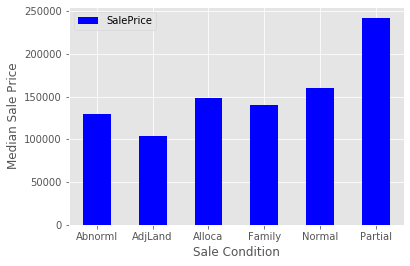

In [27]:
#Continuing with feature engineering
condition_pivot = train.pivot_table(index='SaleCondition', values='SalePrice', aggfunc=np.median)
condition_pivot.plot(kind='bar', color='blue')
plt.xlabel('Sale Condition')
plt.ylabel('Median Sale Price')
plt.xticks(rotation=0)
plt.show()

In [28]:
#encode values
def encode(x):
 return 1 if x == 'Partial' else 0
train['enc_condition'] = train.SaleCondition.apply(encode)
test_df['enc_condition'] = test_df.SaleCondition.apply(encode)

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


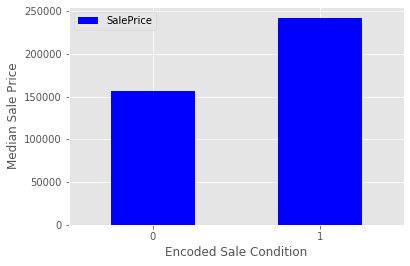

In [29]:
#let's use bar charts to visualise encoded values
condition_pivot = train.pivot_table(index='enc_condition', values='SalePrice', aggfunc=np.median)
condition_pivot.plot(kind='bar', color='blue')
plt.xlabel('Encoded Sale Condition')
plt.ylabel('Median Sale Price')
plt.xticks(rotation=0)
plt.show()

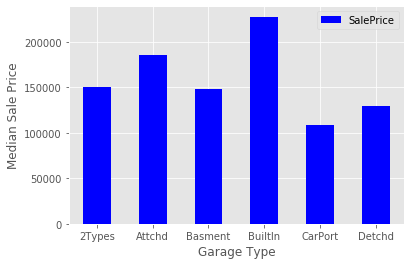

In [30]:
#we are down to 2 values
#lets explore more cat features
garageType_pivot = train.pivot_table(index='GarageType', values='SalePrice', aggfunc=np.median)
garageType_pivot.plot(kind='bar', color='blue')
plt.xlabel('Garage Type')
plt.ylabel('Median Sale Price')
plt.xticks(rotation=0)
plt.show()

In [31]:
#encode values
def encode(x):
 return 1 if x == 'BuiltIn' or x == 'Attchd' else 0
train['enc_garageType'] = train.GarageType.apply(encode)
test_df['enc_garageType'] = test_df.GarageType.apply(encode)

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


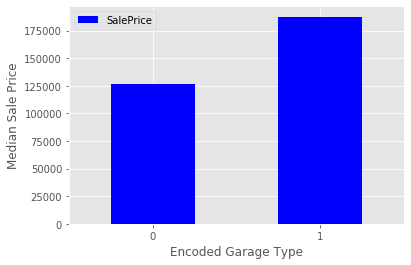

In [32]:
#let's use bar charts to visualise encoded values
garageType_pivot = train.pivot_table(index='enc_garageType', values='SalePrice', aggfunc=np.median)
garageType_pivot.plot(kind='bar', color='blue')
plt.xlabel('Encoded Garage Type')
plt.ylabel('Median Sale Price')
plt.xticks(rotation=0)
plt.show()

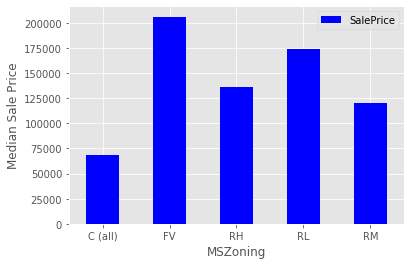

In [33]:
#Continuing with feature engineering
MSZoning_pivot = train.pivot_table(index='MSZoning', values='SalePrice', aggfunc=np.median)
MSZoning_pivot.plot(kind='bar', color='blue')
plt.xlabel('MSZoning')
plt.ylabel('Median Sale Price')
plt.xticks(rotation=0)
plt.show()

In [34]:
#encode values
def encode(x):
 return 1 if x == 'FV' or x =='RL' else 0
train['enc_MSZoning'] = train.MSZoning.apply(encode)
test_df['enc_MSZoning'] = test_df.MSZoning.apply(encode)

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


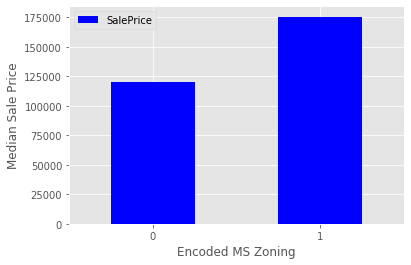

In [35]:
#let's use bar charts to visualise encoded values
MSZoning_pivot = train.pivot_table(index='enc_MSZoning', values='SalePrice', aggfunc=np.median)
MSZoning_pivot.plot(kind='bar', color='blue')
plt.xlabel('Encoded MS Zoning')
plt.ylabel('Median Sale Price')
plt.xticks(rotation=0)
plt.show()

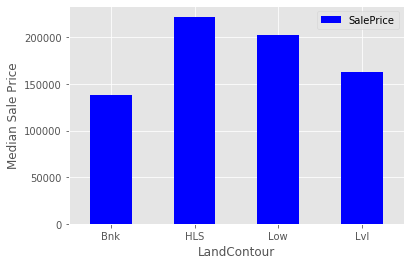

In [36]:
LandContour_pivot = train.pivot_table(index='LandContour', values='SalePrice', aggfunc=np.median)
LandContour_pivot.plot(kind='bar', color='blue')
plt.xlabel('LandContour')
plt.ylabel('Median Sale Price')
plt.xticks(rotation=0)
plt.show()

In [37]:
#encode values
def encode(x):
 return 1 if x == 'HLS' or x =='Low' else 0
train['enc_LandContour'] = train.LandContour.apply(encode)
test_df['enc_LandContour'] = test_df.LandContour.apply(encode)

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


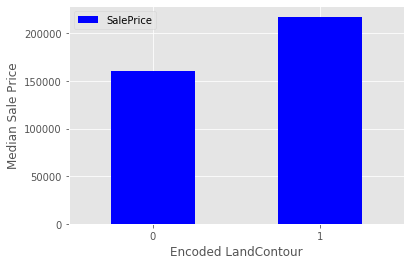

In [38]:
#let's use bar charts to visualise encoded values
LandContour_pivot = train.pivot_table(index='enc_LandContour', values='SalePrice', aggfunc=np.median)
LandContour_pivot.plot(kind='bar', color='blue')
plt.xlabel('Encoded LandContour')
plt.ylabel('Median Sale Price')
plt.xticks(rotation=0)
plt.show()

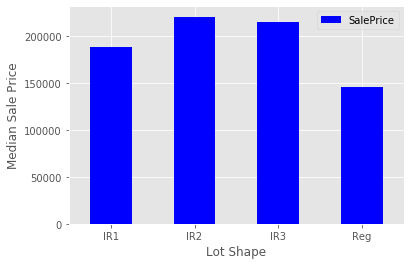

In [39]:
LotShape_pivot = train.pivot_table(index='LotShape', values='SalePrice', aggfunc=np.median)
LotShape_pivot.plot(kind='bar', color='blue')
plt.xlabel('Lot Shape')
plt.ylabel('Median Sale Price')
plt.xticks(rotation=0)
plt.show()

In [40]:
#encode values
def encode(x):
 return 1 if x == 'IR2' or x =='IR3' else 0
train['enc_LotShape'] = train.LotShape.apply(encode)
test_df['enc_LotShape'] = test_df.LotShape.apply(encode)

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


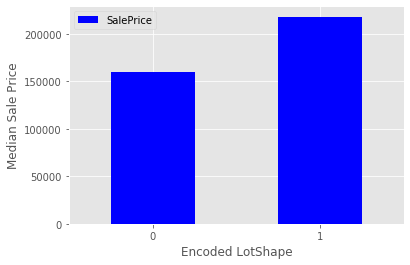

In [41]:
#let's use bar charts to visualise encoded values
LotShape_pivot = train.pivot_table(index='enc_LotShape', values='SalePrice', aggfunc=np.median)
LotShape_pivot.plot(kind='bar', color='blue')
plt.xlabel('Encoded LotShape')
plt.ylabel('Median Sale Price')
plt.xticks(rotation=0)
plt.show()

In [42]:
#Lets remove nulls for numerical features
data = train.select_dtypes(include=[np.number]).interpolate().dropna()

In [43]:
#check if above was successful
sum(data.isnull().sum() != 0)

0

In [44]:
#Now, we'll go on to build a linear model
#Separate the features and the target variable for modeling
#Then assign the features to X and the target variable to y
#Finally use np.log() to transform the y variable for the model
y = np.log(train.SalePrice)
X = data.drop(['SalePrice', 'Id'], axis=1)

In [45]:
#We move on to use train_test_split from sci-kit learn
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
                          X, y, random_state=28, test_size=.28)

In [46]:
#We must instantiate the sklearn chosen model
from sklearn import linear_model
lr = linear_model.LinearRegression()

In [47]:
#Let's fit the model
model = lr.fit(X_train, y_train)

In [48]:
print ("Our R^2 is a value of: \n", model.score(X_test, y_test))

Our R^2 is a value of: 
 0.8992965808329896


In [49]:
#Let's get our Root mean Squared error (RMSE)
predictions = model.predict(X_test)

In [50]:
from sklearn.metrics import mean_squared_error
print ('Our RMSE is a value of: \n', mean_squared_error(y_test, predictions))

Our RMSE is a value of: 
 0.016633828574514335


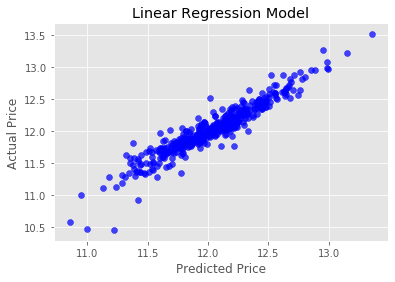

In [51]:
actual_values = y_test
plt.scatter(predictions, actual_values, alpha=.72, color='blue') #alpha helps to show overlapping data
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('Linear Regression Model')
plt.show()

In [52]:
submission = pd.DataFrame()
submission['Id'] = test_df.Id

In [53]:
feats = test_df.select_dtypes(
        include=[np.number]).drop(['Id'], axis=1).interpolate()

In [54]:
predictions = model.predict(feats)

In [55]:
final_predictions = np.exp(predictions)

In [56]:
print ("Original predictions are: \n", predictions[:5], "\n")
print ("Final predictions are: \n", final_predictions[:5])

Original predictions are: 
 [11.65772453 11.87421485 12.05821918 12.18163886 12.18199716] 

Final predictions are: 
 [115580.73046256 143517.87165166 172511.50009942 195172.46124046
 195242.40264061]


In [57]:
submission['SalePrice'] = final_predictions
submission.head()

,Id,SalePrice
0,1461,115580.730463
1,1462,143517.871652
2,1463,172511.500099
3,1464,195172.461240
4,1465,195242.402641


In [58]:
submission.to_csv('submission2.csv', index=False)